# Named entity recognition 
Named entity recognition (NER)is probably the first step towards information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. NER is used in many fields in Natural Language Processing (NLP), and it can help answering many real-world questions, such as:
Which companies were mentioned in the news article?
Were specified products mentioned in complaints or reviews?
Does the tweet contain the name of a person? Does the tweet contain this person’s location?

# Word2Vec

Word2vec is a technique for natural language processing published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. As the name implies, word2vec represents each distinct word with a particular list of numbers called a vector. The vectors are chosen carefully such that a simple mathematical function (the cosine similarity between the vectors) indicates the level of semantic similarity between the words represented by those vectors.

# CBOW and SkipGram
Word2vec can utilize either of two model architectures to produce a distributed representation of words: continuous bag-of-words (CBOW) or continuous skip-gram. In the continuous bag-of-words architecture, the model predicts the current word from a window of surrounding context words. The order of context words does not influence prediction (bag-of-words assumption). In the continuous skip-gram architecture, the model uses the current word to predict the surrounding window of context words. The skip-gram architecture weighs nearby context words more heavily than more distant context words. According to the authors' note,CBOW is faster while skip-gram does a better job for infrequent words.

### Differences
- So as you're probably already aware of, CBOW and Skip-gram are just mirrored versions of each other. CBOW is trained to predict a single word from a fixed window size of context words, whereas Skip-gram does the opposite, and tries to predict several context words from a single input word.

- Intuitively, the first task is much simpler, this implies a much faster convergence for CBOW than for Skip-gram, in the original paper (link below) they wrote that CBOW took hours to train, Skip-gram 3 days.

- Because Skip-gram rely on single words input, it is less sensitive to overfit frequent words, because even if frequent words are presented more times that rare words during training, they still appear individually, while CBOW is prone to overfit frequent words because they appear several time along with the same context. This advantage over frequent words overfitting leads Skip-gram to be also more efficient in term of documents required to achieve good performances, much less than CBOW

### Skip Gram

In [1]:
from gensim.models import word2vec
import pandas as pd

sentences=[['this','movie','is','not','bad'],
          ['I','like','dogs']]

# sg=1 means skip gram , sg=0 means cbow

model=word2vec.Word2Vec(sentences=sentences,
                  vector_size=10,
                  window=2,
                  min_count=1,
                  sg=1)

words=list(model.wv.index_to_key)

embeddings_matrix=model.wv[words]

df_embeddings_matrix = pd.DataFrame(embeddings_matrix,index=words)
df_embeddings_matrix


,0,1,2,3,4,5,6,7,8,9
dogs,-0.005362,0.002364,0.051033,0.090093,-0.093029,-0.071168,0.064589,0.089730,-0.050154,-0.037634
like,0.073805,-0.015335,-0.045366,0.065541,-0.048602,-0.018160,0.028766,0.009919,-0.082852,-0.094488
I,0.073118,0.050703,0.067577,0.007629,0.063509,-0.034054,-0.009464,0.057686,-0.075216,-0.039361
bad,-0.075116,-0.009300,0.095381,-0.073192,-0.023338,-0.019377,0.080774,-0.059309,0.000452,-0.047537
not,-0.096036,0.050073,-0.087596,-0.043918,-0.000351,-0.002962,-0.076612,0.096147,0.049821,0.092331
is,-0.081579,0.044958,-0.041371,0.008245,0.084986,-0.044622,0.045175,-0.067870,-0.035485,0.093985
movie,-0.015777,0.003214,-0.041406,-0.076827,-0.015080,0.024698,-0.008880,0.055337,-0.027430,0.022601
this,0.054558,0.083460,-0.014537,-0.092081,0.043706,0.005718,0.074419,-0.008133,-0.026384,-0.087530


In [2]:
# Checking vector representation
model.wv['movie']

array([-0.01577654,  0.00321372, -0.0414063 , -0.07682689, -0.01508009,
        0.02469795, -0.00888028,  0.05533662, -0.02742977,  0.02260065],
      dtype=float32)

### CBOW

In [3]:
from gensim.models import word2vec

sentences=[['this','movie','is','not','bad'],
          ['I','like','dogs']]

model=word2vec.Word2Vec(sentences=sentences,
                 vector_size=10,
                 window=3,
                 min_count=1,
                  sg=0)

words=model.wv.index_to_key
words

['dogs', 'like', 'I', 'bad', 'not', 'is', 'movie', 'this']

In [4]:
pd.DataFrame(model.wv[words],index=words)

,0,1,2,3,4,5,6,7,8,9
dogs,-0.005362,0.002364,0.051033,0.090093,-0.093029,-0.071168,0.064589,0.089730,-0.050154,-0.037634
like,0.073805,-0.015335,-0.045366,0.065541,-0.048602,-0.018160,0.028766,0.009919,-0.082852,-0.094488
I,0.073118,0.050703,0.067577,0.007629,0.063509,-0.034054,-0.009464,0.057686,-0.075216,-0.039361
bad,-0.075116,-0.009300,0.095381,-0.073192,-0.023338,-0.019377,0.080774,-0.059309,0.000452,-0.047537
not,-0.096036,0.050073,-0.087596,-0.043918,-0.000351,-0.002962,-0.076612,0.096147,0.049821,0.092331
is,-0.081579,0.044958,-0.041371,0.008245,0.084986,-0.044622,0.045175,-0.067870,-0.035485,0.093985
movie,-0.015777,0.003214,-0.041406,-0.076827,-0.015080,0.024698,-0.008880,0.055337,-0.027430,0.022601
this,0.054558,0.083460,-0.014537,-0.092081,0.043706,0.005718,0.074419,-0.008133,-0.026384,-0.087530


# Word Cloud

The term “word cloud” is way too easier to understand. ... It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. 

In [5]:
import wordcloud
import matplotlib.pyplot as plt
import nltk


#### From data set

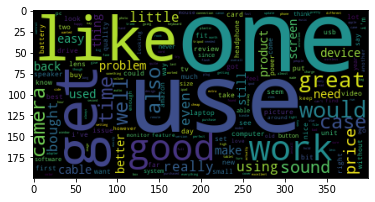

In [6]:
reviews = pd.read_csv('../input/trainings/amazon_reviews_big.csv').sample(1000).reset_index()
reviews.shape

stopwords=nltk.corpus.stopwords.words('english')

docs=reviews['reviewText'].fillna('Not available').str.lower()
docs_strings = ' '.join(docs)
docs_strings

wc=wordcloud.WordCloud(background_color='black',stopwords=stopwords).generate(docs_strings)
plt.imshow(wc)

#### From a string

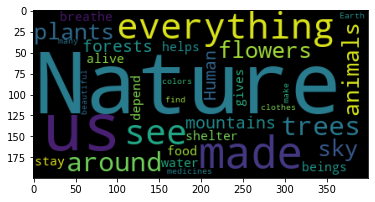

In [7]:
doc='Nature is made of everything we see around us – trees, flowers, plants, animals, sky, mountains, forests and more. Human beings depend on nature to stay alive. Nature helps us breathe, gives us food, water, shelter, medicines, and clothes.We find many colors in nature which make the Earth beautiful.'

wc1=wordcloud.WordCloud(background_color='black').generate(doc)
plt.imshow(wc1)


# GloVe (Global Vectors for Word Representation)

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [8]:
from gensim.models import KeyedVectors

In [9]:
embeddings=KeyedVectors.load_word2vec_format('../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin',binary=True)
len(embeddings)

3000000

In [10]:
words=embeddings.key_to_index

# Checking if a word is in embeddings or not

# False indicates word not present
'nehal' in embeddings

False

In [11]:
# True indicates word is present
'obama' in embeddings

True

#  Document Similarity

Similarity Problem
To find the similarity between texts you first need to define two aspects:
The similarity method that will be used to calculate the similarities between the embeddings.
The algorithm that will be used to transform the text into an embedding, which is a form to represent the text in a vector space.

### Similarity Methods

####  Cosine Similarity
Cosine Similarity measures the cosine of the angle between two embeddings. 



In [12]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity([embeddings['king'],embeddings['man']])[0][1])
print(cosine_similarity([embeddings['king'],embeddings['woman']])[0][1])
print(cosine_similarity([embeddings['king'],embeddings['prince']])[0][1])
print(cosine_similarity([embeddings['king'],embeddings['heir']])[0][1])

0.22942667
0.12847976
0.6159996
0.39654136


#### Euclidean Distance
Euclidean Distance is probably one of the most known formulas for computing the distance between two points applying the Pythagorean theorem.

In [13]:
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances([embeddings['king'],embeddings['man']])[0][1])
print(euclidean_distances([embeddings['king'],embeddings['woman']])[0][1])
print(euclidean_distances([embeddings['king'],embeddings['prince']])[0][1])
print(euclidean_distances([embeddings['king'],embeddings['heir']])[0][1])

3.2687893
3.6735513
2.6465008
3.4940617


In [14]:
embeddings.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581)]